In [ ]:
!pip install mlflow --quiet
!pip install Ipython --upgrade --quiet

     |████████████████████████████████| 16.9 MB 6.8 MB/s 
     |████████████████████████████████| 77 kB 7.9 MB/s 
     |████████████████████████████████| 147 kB 63.8 MB/s 
     |████████████████████████████████| 209 kB 59.1 MB/s 
     |████████████████████████████████| 79 kB 6.6 MB/s 
     |████████████████████████████████| 181 kB 64.2 MB/s 
     |████████████████████████████████| 78 kB 2.1 MB/s 
     |████████████████████████████████| 140 kB 62.1 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 59 kB 7.6 MB/s 
     |████████████████████████████████| 793 kB 7.6 MB/s 
     |████████████████████████████████| 1.6 MB 43.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires 

In [ ]:
# data manipulation 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline, FeatureUnion

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def open_data() -> pd.DataFrame:
  df_raw = datasets.load_breast_cancer()
  print(df_raw.DESCR)
    
  x = pd.DataFrame(df_raw.data)
  y = pd.DataFrame(df_raw.target, columns=['target'])

  return x, y

In [ ]:
y.to_numpy()

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [ ]:
x, y = open_data()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

AttributeError: ignored

In [ ]:
df_join = pd.concat([y,x], axis=1)

In [ ]:
df_join.head()

,target,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_join.shape

(569, 31)

In [ ]:
df_join.describe()

,target,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df_join.describe().T

,count,mean,std,min,25%,50%,75%,max
target,569.0,0.627417,0.483918,0.000000,0.000000,1.000000,1.000000,1.00000
0,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
2,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
3,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
5,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
6,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
7,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
8,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [ ]:
from sklearn import neighbors

,target,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,-1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,-1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape ## analisis Hold-out 

((455, 30), (455, 1), (114, 30), (114, 1))

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

feature_union = []
feature_union.append(('pca', PCA()))
feature_union.append(('scale', StandardScaler()))

features = FeatureUnion(feature_union)

models = []
models.append(('feature_union', features))
models.append(('knn', KNeighborsClassifier(n_neighbors=9)))

model = Pipeline(models)

model.fit(x_train, y_train)

y_pred_2 = model.predict(x_test)



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
seed = 7

cv_k = KFold(n_splits=5)

cv_results = cross_val_score(model, x.to_numpy(), y.to_numpy(), cv = cv_k)
print(cv_results.mean(), cv_results.std())

#print(cv_results)


0.9226828132277596 0.04751289458626751


In [ ]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7))
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred_2)
print(cm)

[[39  3]
 [ 0 72]]


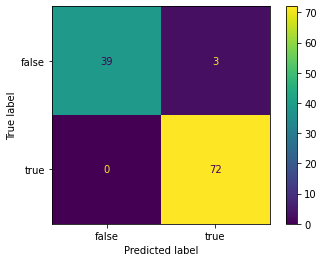

In [ ]:
cm_display = ConfusionMatrixDisplay(cm, display_labels= ['false', 'true'])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

